일반적으로, python 내장 데이터타입보다 넘파이 타입 연산이 10에서 100배 빠르며 메모리도 훠어어ㅓㅇㄹ씬 적게 먹는다....

 NumPy internally stores data in a contiguous block of memory, independent of other built-in Python objects. NumPy’s library of algorithms written in the C language can operate on this memory without any type checking or other overhead. NumPy arrays also use much less memory than built-in Python sequences.
 
  NumPy operations perform complex computations on entire arrays without the need for Python for loops.


In [2]:
import numpy as np
num=1000000
a1=np.arange(num)
%time for _ in range(10): b1=a1*2

Wall time: 51 ms


In [12]:
num=1000000
a2=list(range(num))
%time for _ in range(10): b2=[2*x for x in a2]  #이렇게 해야 모든 원소가 2배 된다.

Wall time: 1.06 s


In [10]:
a=[1,2,3]
print(2*a)

[1, 2, 3, 1, 2, 3]


4.1.The NumPy ndarray: A Multidimensional Array Object
===========

np -> list : data.tolist() / list -> np : np.array(data)  =  ADT 라서 그런듯 하다.
---------

참고 : rand : 0~1 균일분포 / randint : 범위 내 정수 / randn : 표준정규분포

In [6]:
import numpy as np
data=np.random.randn(2,3)        #randn : random normal (정규분포)
print(type(data))
print(9*data+data)  #numpy array 는 일반적인 연산자 적용이 된다.

data=data.tolist()
print(type(data))
print(data+data)  #list 는 일반적인 연산자 적용이 안된다.

<class 'numpy.ndarray'>
[[ 1.508063    3.95497893  1.12724404]
 [-5.37657465 20.06540571  0.03746003]]
<class 'list'>
[[0.15080629981577176, 0.39549789277874353, 0.1127244044380759], [-0.5376574653515986, 2.0065405712963518, 0.003746002591975021], [0.15080629981577176, 0.39549789277874353, 0.1127244044380759], [-0.5376574653515986, 2.0065405712963518, 0.003746002591975021]]


In [8]:
listdata=[1,2,3,4,5]
npdata=np.array(listdata)
print(type(npdata))
print(npdata)

<class 'numpy.ndarray'>
[1 2 3 4 5]


In [15]:
listdata=[[1,2,3],[4,5]]  #안맞아도 변환은 됨. bur 맞춰야 정확히 matrix 인식을 해줌
npdata=np.array(listdata)
print(type(npdata))
print(npdata)

listdata=[[1,2,3],[4,5,6]]
npdata=np.array(listdata)
print(type(npdata))
print(npdata)

<class 'numpy.ndarray'>
[list([1, 2, 3]) list([4, 5])]
<class 'numpy.ndarray'>
[[1 2 3]
 [4 5 6]]


In [20]:
arr=np.array([[1,2,3],[4,5,6],[7,8,9]])  #뒤에 datatype 설정 가능하다.
print("dimension :",arr.ndim,"tensor shape :",arr.shape)
print(arr.dtype)

dimension : 2 tensor shape : (3, 3)
int32


generating  :  zeros, ones, full, empty, arange
--------

In [29]:
A=np.zeros((2,10))  #자동으로 float64 생성인듯
print(A)
print(A.dtype)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
float64


In [42]:
A=np.ones((2,10))  #자동으로 float64 생성인듯
print(A)
print(A.dtype)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]
float64


In [46]:
A=np.full((2,10),2)  #지정한 값으로 생성
print(A)
print(A.dtype)

[[2 2 2 2 2 2 2 2 2 2]
 [2 2 2 2 2 2 2 2 2 2]]
int32


In [33]:
A=np.empty((2,3,2))  #2개의 3 X 2 (list 생성하듯이 순서대로 보면 될듯)
print(A)
print(A.dtype)

[[[0. 0.]
  [0. 0.]
  [0. 0.]]

 [[0. 0.]
  [0. 0.]
  [0. 0.]]]
float64


In [35]:
A=np.arange(15)   #요거는 또 int 자동생성이네..
print(A)
print(A.dtype)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
int32


dtype, astype
------

In [47]:
arr=np.array([1,2,3,4,5])
print(arr.dtype)
arr2=arr.astype(np.float64)
print(arr2.dtype)

int32
float64


In [48]:
int_array=np.array([1,2,3,4,5],dtype=np.int32)
calibers=np.array([.22,.34,.24,.35],dtype=np.float64)
int_array.astype(calibers.dtype)

array([1., 2., 3., 4., 5.])

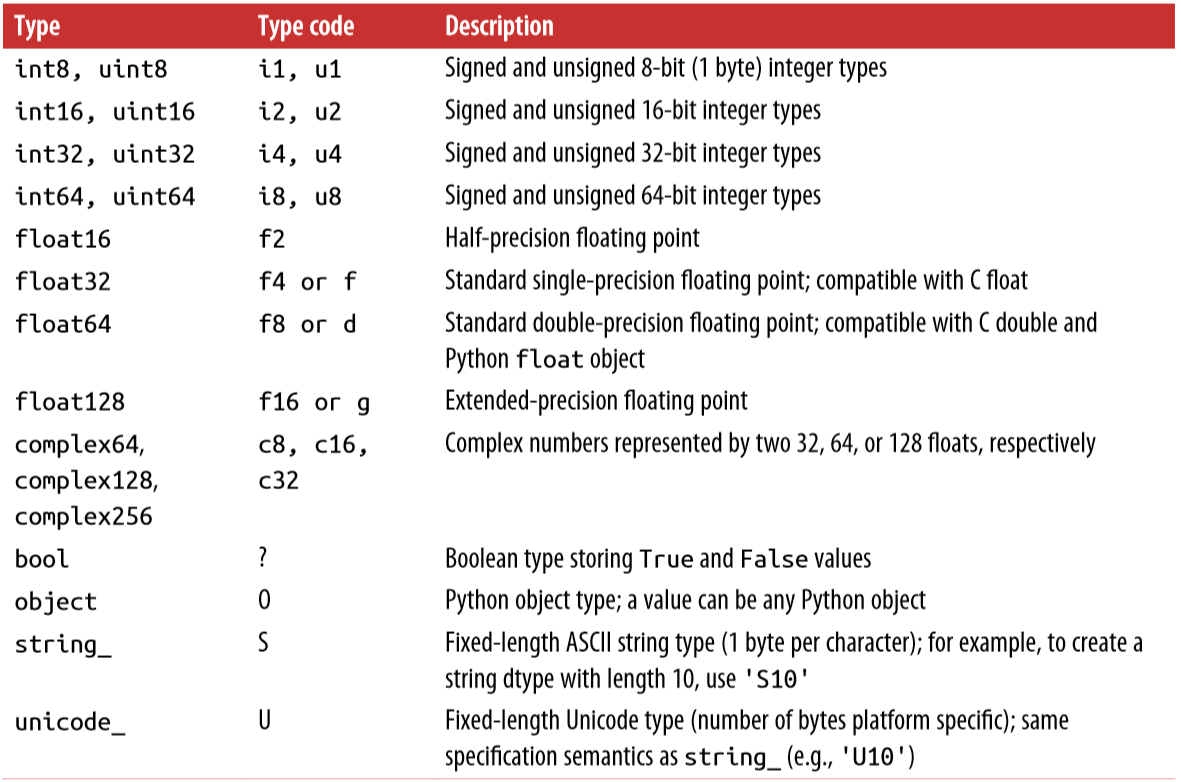

In [49]:
empty_uint32=np.empty(8,dtype='u4')
empty_uint32

array([ 544109173,  577657890, 1768909358,  544745582,  544370534,
       1595944031,  544743468, 1814064745], dtype=uint32)

numpy operations : Basic
-------
element by element 연산이다

In [51]:
arr=np.array([[1.,2,3],[4,5,6]])        #1 빼고 모든곳에 점(.)을 안붙혔는데 결과에는 붙어있다. 하나만 붙으면 다 붙나봄.
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

In [53]:
arr*arr

array([[ 1.,  4.,  9.],
       [16., 25., 36.]])

In [54]:
arr-arr

array([[0., 0., 0.],
       [0., 0., 0.]])

In [55]:
1/arr

array([[1.        , 0.5       , 0.33333333],
       [0.25      , 0.2       , 0.16666667]])

In [56]:
arr**0.5

array([[1.        , 1.41421356, 1.73205081],
       [2.        , 2.23606798, 2.44948974]])

In [57]:
arr2=np.array([[0.,4.,1.],[7.,2.,12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [58]:
arr2>arr

array([[False,  True, False],
       [ True, False,  True]])

Indexing and Slicing
----------

In [62]:
#list 에 대해서는
A=[1,2,3,4,5]
#  A[0:2]=2  이거는 TypeError 이다.
A[0:2]=10,10
print(A)

[10, 10, 3, 4, 5]


In [65]:
arr=np.arange(10)
print(arr)
arr[5:8]=1
print(arr)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 1 1 1 8 9]


sliced object 를 바꾸면 원래 것에도 영향을 준다. (위치참조이기 떄문)

In [67]:
arr=np.zeros(10)
print(arr)
arr_sliced=arr[3:5]
arr_sliced[:]=3
print(arr_sliced)
print(arr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 3.]
[0. 0. 0. 3. 3. 0. 0. 0. 0. 0.]


In [69]:
arr=np.zeros(10)
print(arr)
arr_sliced=arr[3:5].astype(arr.dtype)   #이렇게 해버리면 key가 바뀌기 때문에 괜찮다.
arr_sliced[:]=3
print(arr_sliced)
print(arr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 3.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [70]:
arr=np.zeros(10)
print(arr)
arr_sliced=arr[3:5].copy()   #이렇게 해버리면 key가 바뀌기 때문에 괜찮다. -> deepcopy 처럼 numpy 자체에서 지원하는듯!
arr_sliced[:]=3
print(arr_sliced)
print(arr)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[3. 3.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [74]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(arr3d)
old_values=arr3d[0].copy()
arr3d[0]=42
print(arr3d)
arr3d[0]=old_values
print(arr3d)

[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]
[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]]
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


boolean Indexing
---------------

In [87]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])  #얘가 1 X 7 이라 되는거임.
data=np.random.randn(7,4)
print(data,'\n')
print(  names=='Bob'  ,  '\n'  )
print(  data[names=='Bob',:-1],'\n'  )
print(  data[(names=='Bob')|(names=='Will'),:-1]  )

[[-1.55711079  2.11435028  0.63503453  0.78213454]
 [ 0.37877431  0.09105369  1.52377975 -1.66148993]
 [-0.27488885  0.30813056 -0.04165211  0.5479658 ]
 [-0.10162242  0.51047002  0.05707226  1.0316115 ]
 [ 0.19435983 -0.40412424 -0.23005787  0.37139372]
 [ 0.57267282  1.07846677 -0.13230466  1.01252359]
 [ 0.68529329 -0.70424726 -1.01678583  0.0303223 ]] 

[ True False False  True False False False] 

[[-1.55711079  2.11435028  0.63503453]
 [-0.10162242  0.51047002  0.05707226]] 

[[-1.55711079  2.11435028  0.63503453]
 [-0.27488885  0.30813056 -0.04165211]
 [-0.10162242  0.51047002  0.05707226]
 [ 0.19435983 -0.40412424 -0.23005787]]


In [89]:
data=np.random.randn(7,5)
data[data<0]=0
data

array([[1.17981374, 0.        , 0.36308275, 0.        , 2.1497109 ],
       [0.        , 0.        , 0.        , 0.        , 0.06494434],
       [0.        , 0.25460067, 1.13620919, 0.33091783, 0.        ],
       [0.54400839, 0.48878558, 0.31513124, 0.        , 0.16458973],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.3943669 , 0.        , 0.        , 0.81461379, 0.        ],
       [0.        , 1.25116216, 0.        , 0.56284625, 1.35280634]])

fancy Indexing : element by element indexing, reshape, transpose
--------------

In [96]:
arr=np.empty((8,4))
for i in range(len(arr)):
    arr[i]=i
print(arr)
print(arr[[4,3,2,1,-1]])

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]
[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [2. 2. 2. 2.]
 [1. 1. 1. 1.]
 [7. 7. 7. 7.]]


In [108]:
arr=np.arange(32).reshape((8,4))       #size 가 맞아야만 된다.
print(arr,'\n')
row=[1,2,3]
col=[0,2,1]
print(arr[row,col],'\n')
print(arr[row][col])       #row 로 뽑은 [list] 에서 col 을 뽑은 것이므로 결국 row exchange 밖에 안됨.
print(arr[row][:,col])     #순서 바꿔버리기

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]] 

[ 4 10 13] 

[[ 4  5  6  7]
 [12 13 14 15]
 [ 8  9 10 11]]
[[ 4  6  5]
 [ 8 10  9]
 [12 14 13]]


In [109]:
arr=np.arange(15).reshape((3,5))
np.dot(arr.T,arr)

array([[125, 140, 155, 170, 185],
       [140, 158, 176, 194, 212],
       [155, 176, 197, 218, 239],
       [170, 194, 218, 242, 266],
       [185, 212, 239, 266, 293]])

In [115]:
arr = np.arange(16).reshape((2, 2, 4))
print(arr,'\n')
arr=arr.transpose((1, 0, 2))         #x,y 축을 바꿨으므로 (0,1,z) -> (1,0,z) / (1,0,z) -> (0,1,z) 이다.
print(arr)

[[[ 0  1  2  3]
  [ 4  5  6  7]]

 [[ 8  9 10 11]
  [12 13 14 15]]] 

[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


In [117]:
arr = np.arange(16).reshape((2, 2, 4))
arr=arr.swapaxes(0,1)        #위의 코드와 정확히 같다.
print(arr)

[[[ 0  1  2  3]
  [ 8  9 10 11]]

 [[ 4  5  6  7]
  [12 13 14 15]]]


4.2.Universal Functions: Fast Element-Wise Array Functions
===============

A universal function, or ufunc, is a function that performs element-wise operations on data in ndarrays

In [126]:
arr=np.arange(10).reshape((2,5))
print(arr)
print(np.sqrt(arr,dtype='f4'))
print(np.exp(arr,dtype='f4'))

[[0 1 2 3 4]
 [5 6 7 8 9]]
[[0.        1.        1.4142135 1.7320508 2.       ]
 [2.236068  2.4494898 2.6457512 2.828427  3.       ]]
[[1.0000000e+00 2.7182817e+00 7.3890562e+00 2.0085537e+01 5.4598148e+01]
 [1.4841316e+02 4.0342880e+02 1.0966332e+03 2.9809580e+03 8.1030840e+03]]


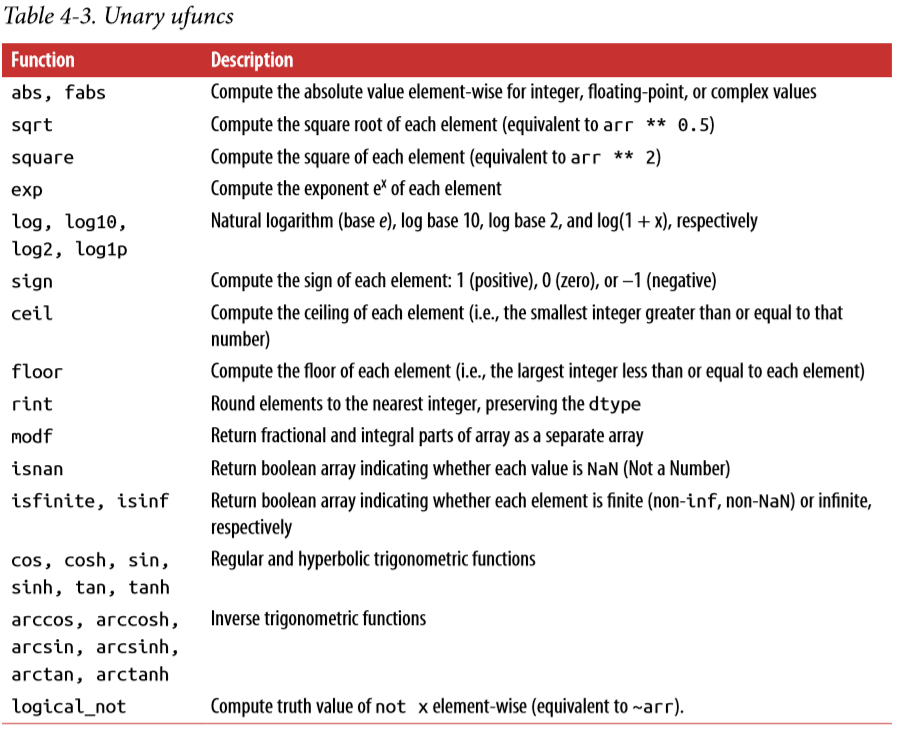

In [133]:
arr = np.random.randn(7).astype("f2") * 5
remainder,whole_part=np.modf(arr)
print(remainder)
print(whole_part)

[ 0.672   0.3516  0.7695 -0.549   0.4658 -0.0166 -0.867 ]
[ 0.  5.  3. -2.  0. -1. -1.]


In [135]:
arr=np.random.randn(8).reshape((4,2))
arr2=np.sqrt(arr)
print(arr2)
print(np.isnan(arr2))

[[       nan        nan]
 [0.96225987        nan]
 [0.46778026 0.70533052]
 [1.13848184        nan]]
[[ True  True]
 [False  True]
 [False False]
 [False  True]]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


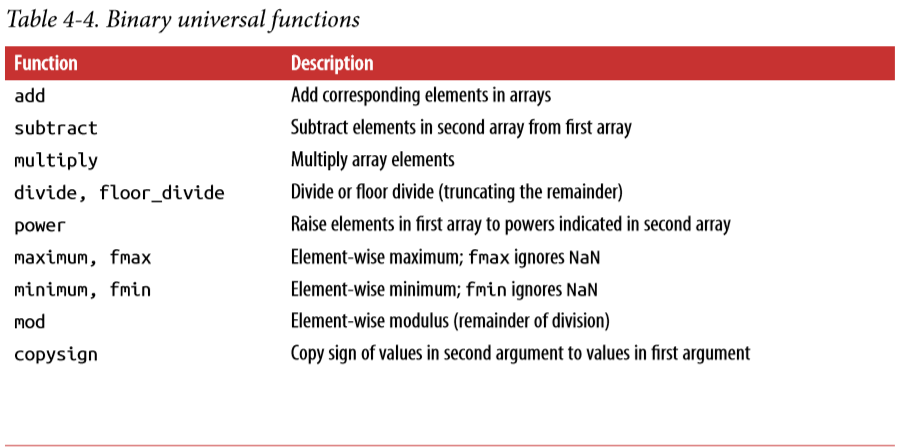

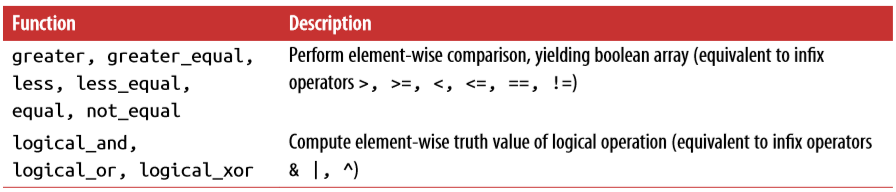

In [136]:
x=np.random.randn(8)
y=np.random.randn(8)
print(np.maximum(x,y))

[-0.25663999  0.68292417 -0.05972808  0.58509491  0.72911258  1.42184975
  1.56534985  1.51124567]


4.3.Array-Oriented Programming with Arrays
=================

meshgrid
-------

In [137]:
points=np.arange(-5,5,0.01)
xs,ys=np.meshgrid(points,points)
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ...,
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [138]:
z=np.sqrt(xs**2+ys**2)
z

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2+y^2}$ for a grid of values')

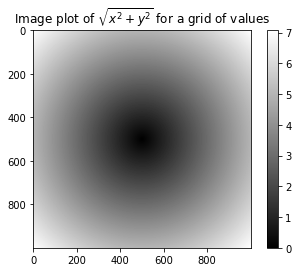

In [140]:
import matplotlib.pyplot as plt
plt.imshow(z,cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2+y^2}$ for a grid of values")

where
---------

In [145]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result=[(x if c else y) for x,y,c in zip(xarr,yarr,cond)]
print(result)
print(type(result))

[1.1, 2.2, 1.3, 1.4, 2.5]
<class 'list'>


In [146]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])
result=np.where(cond,xarr,yarr)           #위의 코드와 같다.(타입만 다름)
print(result)
print(type(result))

[1.1 2.2 1.3 1.4 2.5]
<class 'numpy.ndarray'>


In [147]:
arr=np.random.randn(4,4)
result=np.where(arr<0,0,arr)        #자동으로 좌표대응되는 것이 아주 신기하다.
print(result)

[[0.         0.         0.         0.        ]
 [0.         1.71791151 0.28497916 0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.69649542 0.63713646 0.        ]]


Mathematical and Statistical Methods : mean, str, var,...
---------

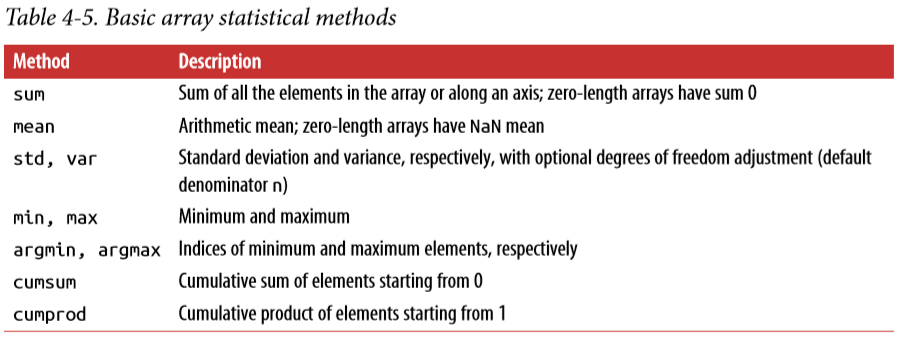

In [8]:
arr=np.random.randn(5,4)
print(arr)
print(arr.mean())
print(arr.sum())
print(arr.std())

[[-0.98359616 -1.95899101 -0.97312508 -1.21246912]
 [-0.25928516 -0.03252136 -0.45634538  0.05076905]
 [-2.47690579  0.9027129   0.35244114 -0.27628791]
 [-0.51579815  0.1093912   1.75136874  0.41420987]
 [ 0.53709447  0.81457468  2.07178388 -0.79825393]]
-0.14696165669662514
-2.939233133932503
1.0866968455264459


In [10]:
arr=np.arange(15).reshape((3,5))
print(arr)
print(arr.mean(axis=0))       #axis 0 는 row이기 때문에 row가 바뀌면서 적용된다고 생각. 아래도 마찬가지
print(arr.mean(axis=1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]
[5. 6. 7. 8. 9.]
[ 2.  7. 12.]


In [12]:
arr=np.arange(9).reshape((3,3))
print(arr)
print(arr.cumsum())
print(arr.cumsum(axis=0))
print(arr.cumprod(axis=1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]
[ 0  1  3  6 10 15 21 28 36]
[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]
[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


Methods for Boolean Arrays : any, all
--------

In [14]:
arr=np.random.randn(100)
print('Number of positives :',(arr>0).sum())
arr2=np.where(arr>0,arr,0)
print('Their sum :',arr2.sum())

Number of positives : 47
Their sum : 34.304611021950066


In [16]:
arr=np.random.randn(10)
bools=arr>0
print(bools)
print(bools.any())   #하나라도 True 이면 True
print(bools.all())   #모두 True이어야 True

[False  True  True  True  True  True  True False  True False]
True
False


Sorting
---------

In [19]:
arr=np.random.randn(6).reshape((2,3))
print(arr)
arr2=arr.copy()
arr.sort(0)
arr2.sort(1)
print(arr)
print(arr2)

[[ 0.1673245  -1.4257281   0.1552176 ]
 [-0.17384128  0.38922518 -0.47483501]]
[[-0.17384128 -1.4257281  -0.47483501]
 [ 0.1673245   0.38922518  0.1552176 ]]
[[-1.4257281   0.1552176   0.1673245 ]
 [-0.47483501 -0.17384128  0.38922518]]


In [23]:
arr=np.random.randn(1000)
arr.sort()
arr[ int( 0.05*len(arr) ) ]  # 5% quantile

-1.5664152788577015

Unique and Other Set Logic
---------
파이썬 set {} 의 numpy 버전이라고 보면 됨

In [24]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [25]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
sorted(set(names))

['Bob', 'Joe', 'Will']

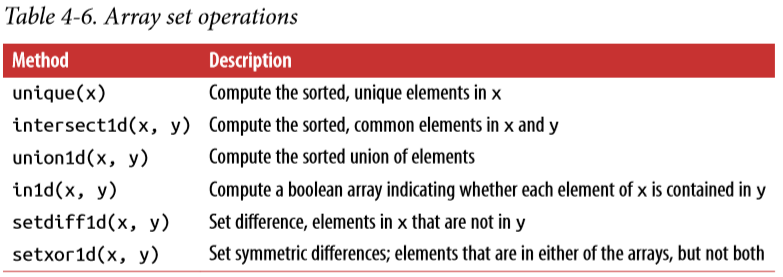

4.5.Linear Algebra
============
보통의 연산이 elementwise로 정의되었기 때문에 matrix 연산은 따로 사용해야 한다.

In [7]:
x=np.array([[1,2,3],[4,5,6.]])
y=np.array([[6,23],[-1,7],[8,9]])
print(x.shape,y.shape)
print(np.dot(x,y))

(2, 3) (3, 2)
[[ 28.  64.]
 [ 67. 181.]]


In [8]:
x=np.array([[1,2,3],[4,5,6.]])
y=np.ones((3,2))
x.dot(y)

array([[ 6.,  6.],
       [15., 15.]])

In [9]:
x=np.array([[1,2,3],[4,5,6.]])
x@np.ones(3)

array([ 6., 15.])

linalg 에는 기본적인 matrix 연산자가 들어있다.
---------

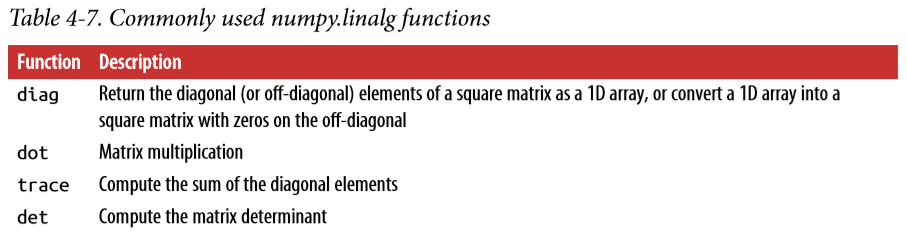

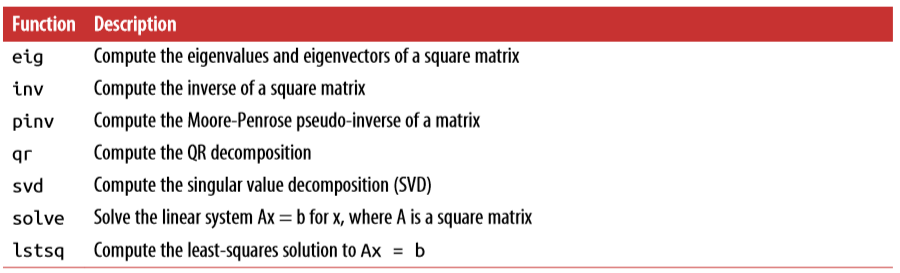

In [16]:
from numpy.linalg import inv   #inverse matrix
x=np.random.randn(5,5)
xinv=inv(x)
np.dot(xinv,x).astype('f2')

array([[ 1.,  0.,  0.,  0., -0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1., -0., -0.],
       [-0.,  0., -0.,  1., -0.],
       [ 0.,  0., -0., -0.,  1.]], dtype=float16)

In [17]:
from numpy.linalg import qr   #qr factorization
x=np.arange(25).reshape((5,5))
q,r=qr(x)
np.dot(q,r).astype('f2')

array([[ 0.,  1.,  2.,  3.,  4.],
       [ 5.,  6.,  7.,  8.,  9.],
       [10., 11., 12., 13., 14.],
       [15., 16., 17., 18., 19.],
       [20., 21., 22., 23., 24.]], dtype=float16)

4.6.Pseudorandom Number Generation
----------------
The numpy.random module supplements the built-in Python random with functions for efficiently generating whole arrays of sample values from many kinds of probability distribution

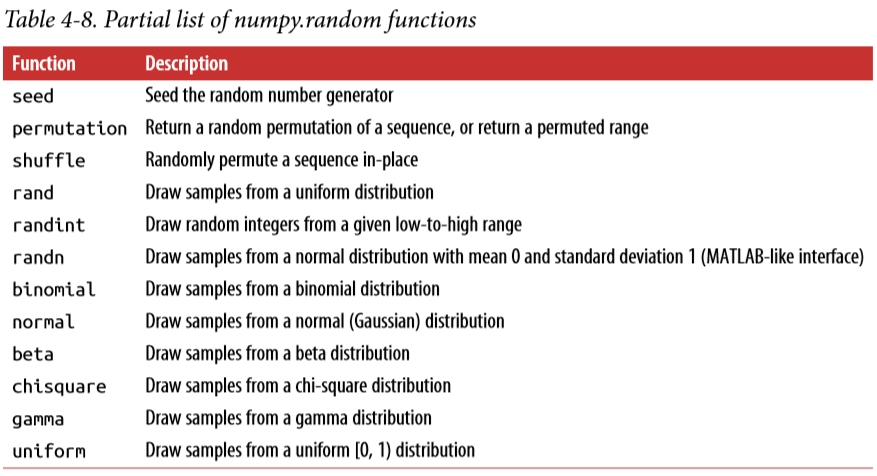

randn 은 mean 0 std 1 로 고정되어 바꿀 수 없지만 자주 사용되는 평균정규분포이고 normal 은 바꿀 수 있다. 물론 normal 의 기본값 역시 mean 0 std 1 이다.

In [25]:
sample=np.random.normal(loc=10,scale=3,size=(3,3))
sample

array([[13.48220227, 11.29838871,  5.24094501],
       [ 5.86470195,  7.51655683, 11.64136059],
       [12.56915937,  8.51519294,  6.64297896]])

In [27]:
sample=np.random.randn(3,3)
sample

array([[-1.77227022,  1.2269471 ,  1.64322317],
       [-2.16272672,  0.8400923 , -0.17146979],
       [ 0.60337721, -0.32674287,  0.8090839 ]])

python built-in random module 이 있으나 numpy.random 이 훠어어얼씬 빠르다.

In [28]:
from random import normalvariate
N=1000000
%timeit samples=[normalvariate(0,1) for _ in range(N)]

1.2 s ± 115 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [29]:
%timeit np.random.normal(size=N)

40.1 ms ± 5.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


global seed vs local seed
---------

In [35]:
#np.random.seed(1) #이것은 global seed 이다.
#반면 아래를 보자.
localseed=np.random.RandomState(1)
print(localseed.randn(5))  #이건 안바뀐다.
print(np.random.randn(5))

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763]
[ 1.57293971 -1.14592864  0.06890616 -0.36447436  1.9887263 ]


4.7.Random Walks
============

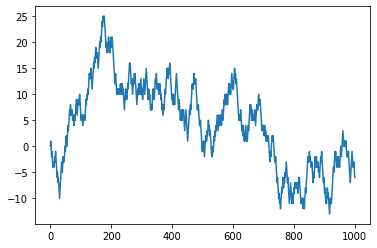

In [37]:
import random
position=0
walk=[position]
steps=1000
for i in range(steps):
    step=1 if random.randint(0,1) else -1
    position += step
    walk.append(position)
import matplotlib.pyplot as plt
plt.plot(walk)

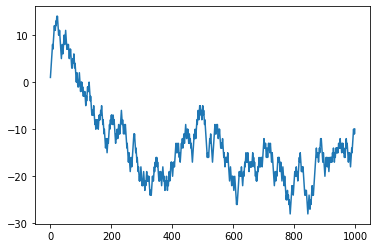

In [38]:
nsteps=1000
draws=np.random.randint(0,2,size=nsteps)
steps=np.where(draws>0,1,-1)
walk=steps.cumsum()
import matplotlib.pyplot as plt
plt.plot(walk)

In [39]:
walk.min()

-28

In [40]:
walk.max()

14

In [42]:
(np.abs(walk)>=10).argmax()   #argmax 는 가장 큰 값의 index (중복되면 처음것만) 를 반환한다. 즉, TRUE 의 첫 index 반환.

11

In [43]:
nwalks=5000
nsteps=1000
draws=np.random.randint(0,2,size=(nwalks,nsteps))
steps=np.where(draws>0,1,-1)
walks=steps.cumsum(1)
walks

array([[  1,   0,   1, ..., -16, -17, -16],
       [ -1,   0,  -1, ..., -30, -29, -28],
       [  1,   2,   1, ..., -52, -53, -54],
       ...,
       [ -1,   0,   1, ..., -30, -31, -32],
       [ -1,   0,   1, ...,  -6,  -5,  -4],
       [ -1,  -2,  -1, ..., -22, -21, -20]], dtype=int32)

In [44]:
walks.max()

109

In [45]:
walks.min()

-118

In [47]:
hit30=(np.abs(walks)>=30).any(1)
hit30

array([ True,  True,  True, ...,  True, False,  True])

In [48]:
hit30.sum()

3389

In [49]:
crossing_times=( np.abs( walks[hit30] ) >=30).argmax(1)
crossing_times

array([845, 995, 605, ..., 437, 763, 393], dtype=int64)

In [50]:
crossing_times.mean()

501.54234287400413